In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings
filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx
/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv


In [35]:
import sklearn
print(sklearn.__version__)


0.22.2.post1


In [16]:
import pandas as pd

# Read datasets
df_inf = pd.read_csv("/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv", encoding='iso-8859-1')

df_noinf = pd.read_excel("/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx", 
                         sheet_name="Full_new", engine="openpyxl")

# Print shapes of the datasets
print(f"Shape of df_inf: {df_inf.shape}")
print(f"Shape of df_noinf: {df_noinf.shape}")


Shape of df_inf: (541, 6)
Shape of df_noinf: (541, 45)


In [17]:
sheets = pd.ExcelFile("/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx", engine="openpyxl")
print(sheets.sheet_names)


['Instructions', 'Full_new']


In [18]:
#Sample data from df_inf
df_inf.sample(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
202,203,10203,0,596.20,596.20,2.3
434,435,10435,1,1.99,1.99,9.9
244,245,10245,1,1.99,1.99,4.1
340,341,10341,1,161.77,161.77,5.9
316,317,10317,0,409.85,409.85,2.23


In [19]:
#Sample data from df_noinf
df_noinf.sample(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
527,528,528,0,22,62.0,162.0,23.600000,15,74,22,...,0.0,0,120,80,10,9,21.0,18.0,6.2,NaN
252,253,253,1,47,62.7,154.0,26.437848,15,72,18,...,0.0,0,110,80,14,11,16.0,19.0,9.3,NaN
495,496,496,1,27,64.0,155.0,26.600000,13,72,20,...,1.0,0,120,70,10,11,18.0,16.0,6.4,NaN
65,66,66,0,32,71.0,172.0,23.999459,12,70,18,...,0.0,0,100,70,2,4,12.0,14.0,9.4,NaN
215,216,216,0,41,71.0,160.0,27.734375,15,74,20,...,1.0,1,120,80,9,7,14.0,14.0,10.0,NaN


## Feature Selection

In [20]:
#Identifying Features which have more than 0.40 correlation with PCOS(Y/N)

corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.4
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [21]:
df_inf.corrwith(df_inf["PCOS (Y/N)"]).abs()

Sl. No                    0.060998
Patient File No.          0.060998
PCOS (Y/N)                1.000000
  I   beta-HCG(mIU/mL)    0.027617
II    beta-HCG(mIU/mL)    0.012757
dtype: float64

In [22]:
df_noinf=df_noinf[corr_features]
df_noinf.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0,3,3,0,0,0,2
1,0,5,3,0,0,0,2
2,1,15,13,0,0,0,2
3,0,2,2,0,0,0,2
4,0,4,3,0,0,0,2


In [23]:
df_noinf.columns

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

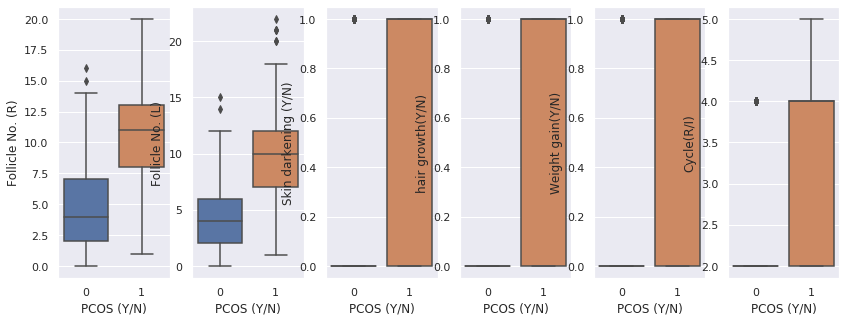

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,6,1)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (R)',data=df_noinf)
#plt.subplot(1,7,2)
#sns.boxplot(x='PCOS (Y/N)',y='Insulin levels (æIU/ml)',data=df_noinf)
plt.subplot(1,6,2)
sns.boxplot(x='PCOS (Y/N)',y='Follicle No. (L)',data=df_noinf)
plt.subplot(1,6,3)
sns.boxplot(x='PCOS (Y/N)',y='Skin darkening (Y/N)',data=df_noinf)
plt.subplot(1,6,4)
sns.boxplot(x='PCOS (Y/N)',y='hair growth(Y/N)',data=df_noinf)
plt.subplot(1,6,5)
sns.boxplot(x='PCOS (Y/N)',y='Weight gain(Y/N)',data=df_noinf)
plt.subplot(1,6,6)
sns.boxplot(x='PCOS (Y/N)',y='Cycle(R/I)',data=df_noinf)

plt.show()

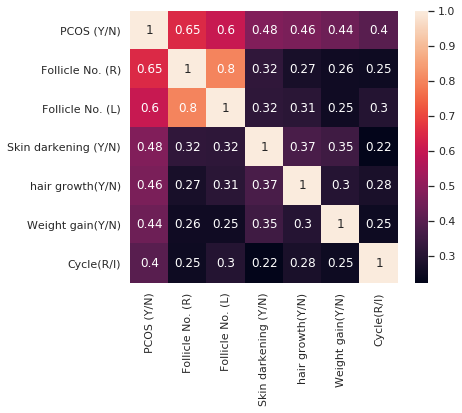

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(df_noinf.corr(), annot=True)
plt.show()

In [28]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

In [29]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

## Training Model

In [30]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f"Score in Train Data : {model.score(X_train,y_train)}")

Score in Train Data : 0.9120370370370371


## Prediction

In [31]:
y_pred=model.predict(X_test)

## Model Evaluation

In [32]:
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.8990825688073395
Right classification : 98
Wrong classification : 11


array([[65,  6],
       [ 5, 33]])

In [33]:
import joblib

# Save the trained model
joblib.dump(model, "pcos_model.pkl")

print("Model saved as pcos_model.pkl")


Model saved as pcos_model.pkl


In [34]:
import os
print(os.listdir("/kaggle/working/"))


['pcos_model.pkl']
